# Scaling and Transformation 

Scaling and transformation are crucial steps in Exploratory Data Analysis (EDA) for data analysts. They help to ensure that your data is in a proper range and format for model building or analysis.

**Scaling**

 This involves adjusting the range of your data so that features are on a similar scale. This is especially important when features have vastly different units (e.g., income in dollars vs. age in years).

**Transformation**

This changes the structure of the data to make it more suitable for analysis. For example, transformations can be used to make a skewed distribution more normal (which many machine learning algorithms prefer).

In [22]:
#load data

In [24]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import numpy as np

# Load the data
data = pd.DataFrame({
    'Price': [450000, 800000, 120000, 550000, 300000],
    'Size': [1800, 2500, 1500, 2000, 1700],
    'Bedrooms': [3, 4, 2, 3, 2],
    'Age': [5, 2, 20, 10, 15]
})

print(data)


    Price  Size  Bedrooms  Age
0  450000  1800         3    5
1  800000  2500         4    2
2  120000  1500         2   20
3  550000  2000         3   10
4  300000  1700         2   15


In [26]:
# Apply Scaling


**1. Min-Max Scaling**

This will scale the values between 0 and 1.

In [35]:
scaler = MinMaxScaler()

# Scale the data
data_scaled = scaler.fit_transform(data)
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)

print("Min-Max Scaled Data:")
print(data_scaled)


Min-Max Scaled Data:
      Price  Size  Bedrooms       Age
0  0.485294   0.3       0.5  0.166667
1  1.000000   1.0       1.0  0.000000
2  0.000000   0.0       0.0  1.000000
3  0.632353   0.5       0.5  0.444444
4  0.264706   0.2       0.0  0.722222


**2. Standardization (Z-Score Scaling)**

In [38]:
scaler = StandardScaler()

# Scale the data
data_standardized = scaler.fit_transform(data)
data_standardized = pd.DataFrame(data_standardized, columns=data.columns)

print("Standardized Data (Z-Score):")
print(data_standardized)


Standardized Data (Z-Score):
      Price      Size  Bedrooms       Age
0  0.026126 -0.293610  0.267261 -0.826961
1  1.550113  1.761661  1.603567 -1.286384
2 -1.410777 -1.174440 -1.069045  1.470153
3  0.461551  0.293610  0.267261 -0.061256
4 -0.627012 -0.587220 -1.069045  0.704448


In [40]:
#apply transformation

**1. Log Transformation**

In [46]:
# Apply log transformation to the 'Price' column (adding 1 to avoid log(0))
data['Price_Log'] = np.log(data['Price'] + 1)

print("Log Transformed Price Data:")
print(data[['Price', 'Price_Log']])


Log Transformed Price Data:
    Price  Price_Log
0  450000  13.017005
1  800000  13.592368
2  120000  11.695255
3  550000  13.217675
4  300000  12.611541


**2. Square Root Transformation**

In [49]:
# Apply square root transformation
data['Price_Sqrt'] = np.sqrt(data['Price'])

print("Square Root Transformed Price Data:")
print(data[['Price', 'Price_Sqrt']])


Square Root Transformed Price Data:
    Price  Price_Sqrt
0  450000  670.820393
1  800000  894.427191
2  120000  346.410162
3  550000  741.619849
4  300000  547.722558


**Visualize Before and After Transformation**
You can plot the data before and after scaling or transformation to better understand how it changes the distribution.

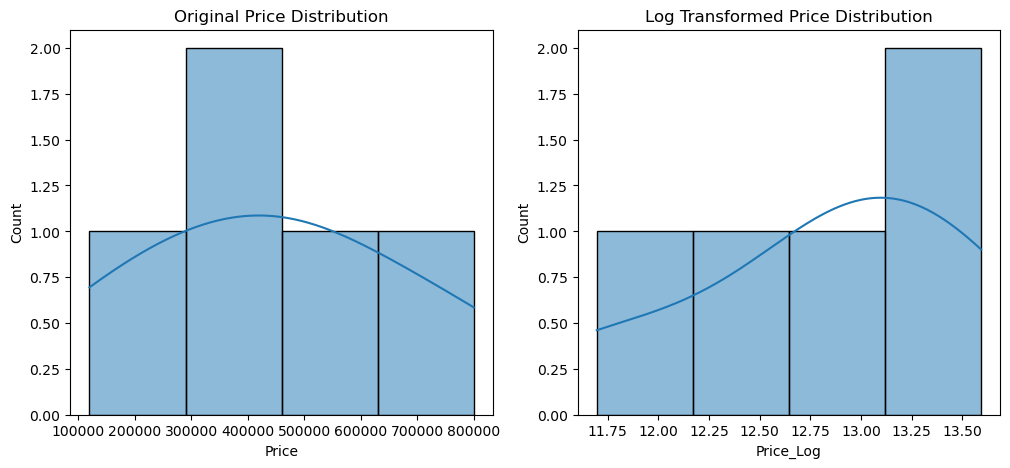

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot original vs log transformed prices
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(data['Price'], ax=ax[0], kde=True).set(title='Original Price Distribution')
sns.histplot(data['Price_Log'], ax=ax[1], kde=True).set(title='Log Transformed Price Distribution')

plt.show()


**Analyze Impact of Scaling and Transformation**

**Scaling:** After scaling, all features will be in the same range. Min-Max scaling is useful for models like k-nearest neighbors (KNN), where distance matters.

**Transformation:** After log or square root transformation, skewed data will become more symmetric, making it suitable for algorithms like linear regression.